In [138]:
import pandas as pd
import numpy as np

In [139]:
df0 = pd.read_csv('./after_preprocessing_data/all_df.csv')

In [140]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536097 entries, 0 to 536096
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   자치구                536097 non-null  object 
 1   계약일                536097 non-null  object 
 2   건물면적(㎡)            536097 non-null  float64
 3   층                  536097 non-null  int64  
 4   KOSPI종가            536097 non-null  float64
 5   Fed기준금리            536097 non-null  float64
 6   국제유가(Dubai)($/배럴)  536097 non-null  float64
 7   부동산거래량             536097 non-null  int64  
 8   국고채3년(평균)          536097 non-null  float64
 9   국고채5년(평균)          536097 non-null  float64
 10  국고채10년(평균)         536097 non-null  float64
 11  회사채3년(평균)          536097 non-null  float64
 12  CD91물(평균)          536097 non-null  float64
 13  콜금리(1일물,평균)        536097 non-null  float64
 14  BOK기준금리            536097 non-null  float64
 15  건물연식               536097 non-null  int64  
 16  GD

In [141]:
df0['환율종가'] = df0['환율종가'].str.replace(',','')

In [142]:
df0['환율종가'] = df0['환율종가'].astype('float')

# EPU 컬럼이름 변경

In [143]:
df0 = df0.rename(columns= {'South Korea' : 'EPU'})

In [144]:
df0

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원),환율종가,금값종가,선행지수순환변동치,EPU
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.67,1.49,1.50,25,83.3,18000,1175.45,76.81,99.6,177.148845
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.67,1.49,1.50,26,83.3,55200,1175.45,76.81,99.6,177.148845
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.67,1.49,1.50,14,83.3,36800,1175.45,76.81,99.6,177.148845
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.67,1.49,1.50,6,83.3,67600,1175.45,76.81,99.6,177.148845
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.67,1.49,1.50,26,83.3,30300,1175.45,76.81,99.6,177.148845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.63,3.59,...,4.02,3.24,3.25,18,105.0,250000,1260.92,76.11,99.1,169.662386
536093,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.63,3.59,...,4.02,3.24,3.25,34,105.0,138000,1260.92,76.11,99.1,169.662386
536094,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.63,3.59,...,4.02,3.24,3.25,14,105.0,172000,1260.92,76.11,99.1,169.662386
536095,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.63,3.59,...,4.02,3.24,3.25,26,105.0,37000,1260.92,76.11,99.1,169.662386


# 장단기 Spread 컬럼 추가 
- 국채 3년 - 콜금리
- 기존 컬럼 지우기

In [145]:
df0['장단기금리spread']= df0['국고채3년(평균)'] - df0['콜금리(1일물,평균)']

In [146]:
df0.loc[df0['장단기금리spread']<0, '계약일'].unique()

array(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
       '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08',
       '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13',
       '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
       '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
       '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
       '2016-02-26', '2016-02-27', '2016-02-28', '2016-02-29',
       '2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
       '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
       '2016-04-09', '2016-04-10', '2016-04-11', '2016-04-12',
       '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
       '2016-04-17', '2016-04-18', '2016-04-19', '2016-04-20',
       '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24',
       '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
       '2016-04-29', '2016-04-30', '2016-05-01', '2016-05-02',
       '2016-05-03', '2016-05-04', '2016-05-05', '2016-

In [147]:
df0 = df0.drop(['국고채3년(평균)', '콜금리(1일물,평균)'], axis=1)

# Target 컬럼 '물건금액(만원)' 자리 이동

In [148]:
# '물건금액(만원)' 컬럼을 마지막으로 이동시키기
cols = df0.columns.tolist()
cols.remove('물건금액(만원)')
cols.append('물건금액(만원)')
df0 = df0[cols]

df0.head()

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU,장단기금리spread,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.5,25,83.3,1175.45,76.81,99.6,177.148845,0.14,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.5,26,83.3,1175.45,76.81,99.6,177.148845,0.14,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.5,14,83.3,1175.45,76.81,99.6,177.148845,0.14,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.5,6,83.3,1175.45,76.81,99.6,177.148845,0.14,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.5,26,83.3,1175.45,76.81,99.6,177.148845,0.14,30300


# Train/Test Split


In [149]:
# Train : 2016-2020
# Test : 2021-2022

df0['계약일'] = pd.to_datetime(df0['계약일'])

In [150]:
train_df = df0.loc[df0['계약일'] < '2021']

In [151]:
test_df = df0.loc[df0['계약일'] >= '2021']

# 전체 DF OLS 확인

In [152]:
# feature & target  split

X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

In [153]:
# X_train : 숫자형 컬럼만 
X_train = X.select_dtypes([np.number])

## 통계적 검정 
1. 정규성 - Shapiro & KS
2. 등분산성 - bartlett
3. 독립성 - 더빈 & 왓슨
4. 선형성 - Scatter Plot

### 1. 정규성

In [154]:
# Shapiro -> X 
from scipy import stats
for i in X_train.columns:
    a = stats.shapiro(X_train[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0


In [155]:
# Shapiro -> y
from scipy import stats
a = stats.shapiro(y)
p = a.pvalue   
print(p)

0.0


In [156]:
# KS -> X 
from scipy.stats import kstest
for i in X_train.columns:
    a = kstest(X_train[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0


국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0


In [157]:
# KS -> y
from scipy.stats import kstest

a = kstest(y,'norm')
p = a.pvalue
print(i,p)

장단기금리spread 0.0


---

### 정규성 검정 2 -QQ plot 

In [158]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

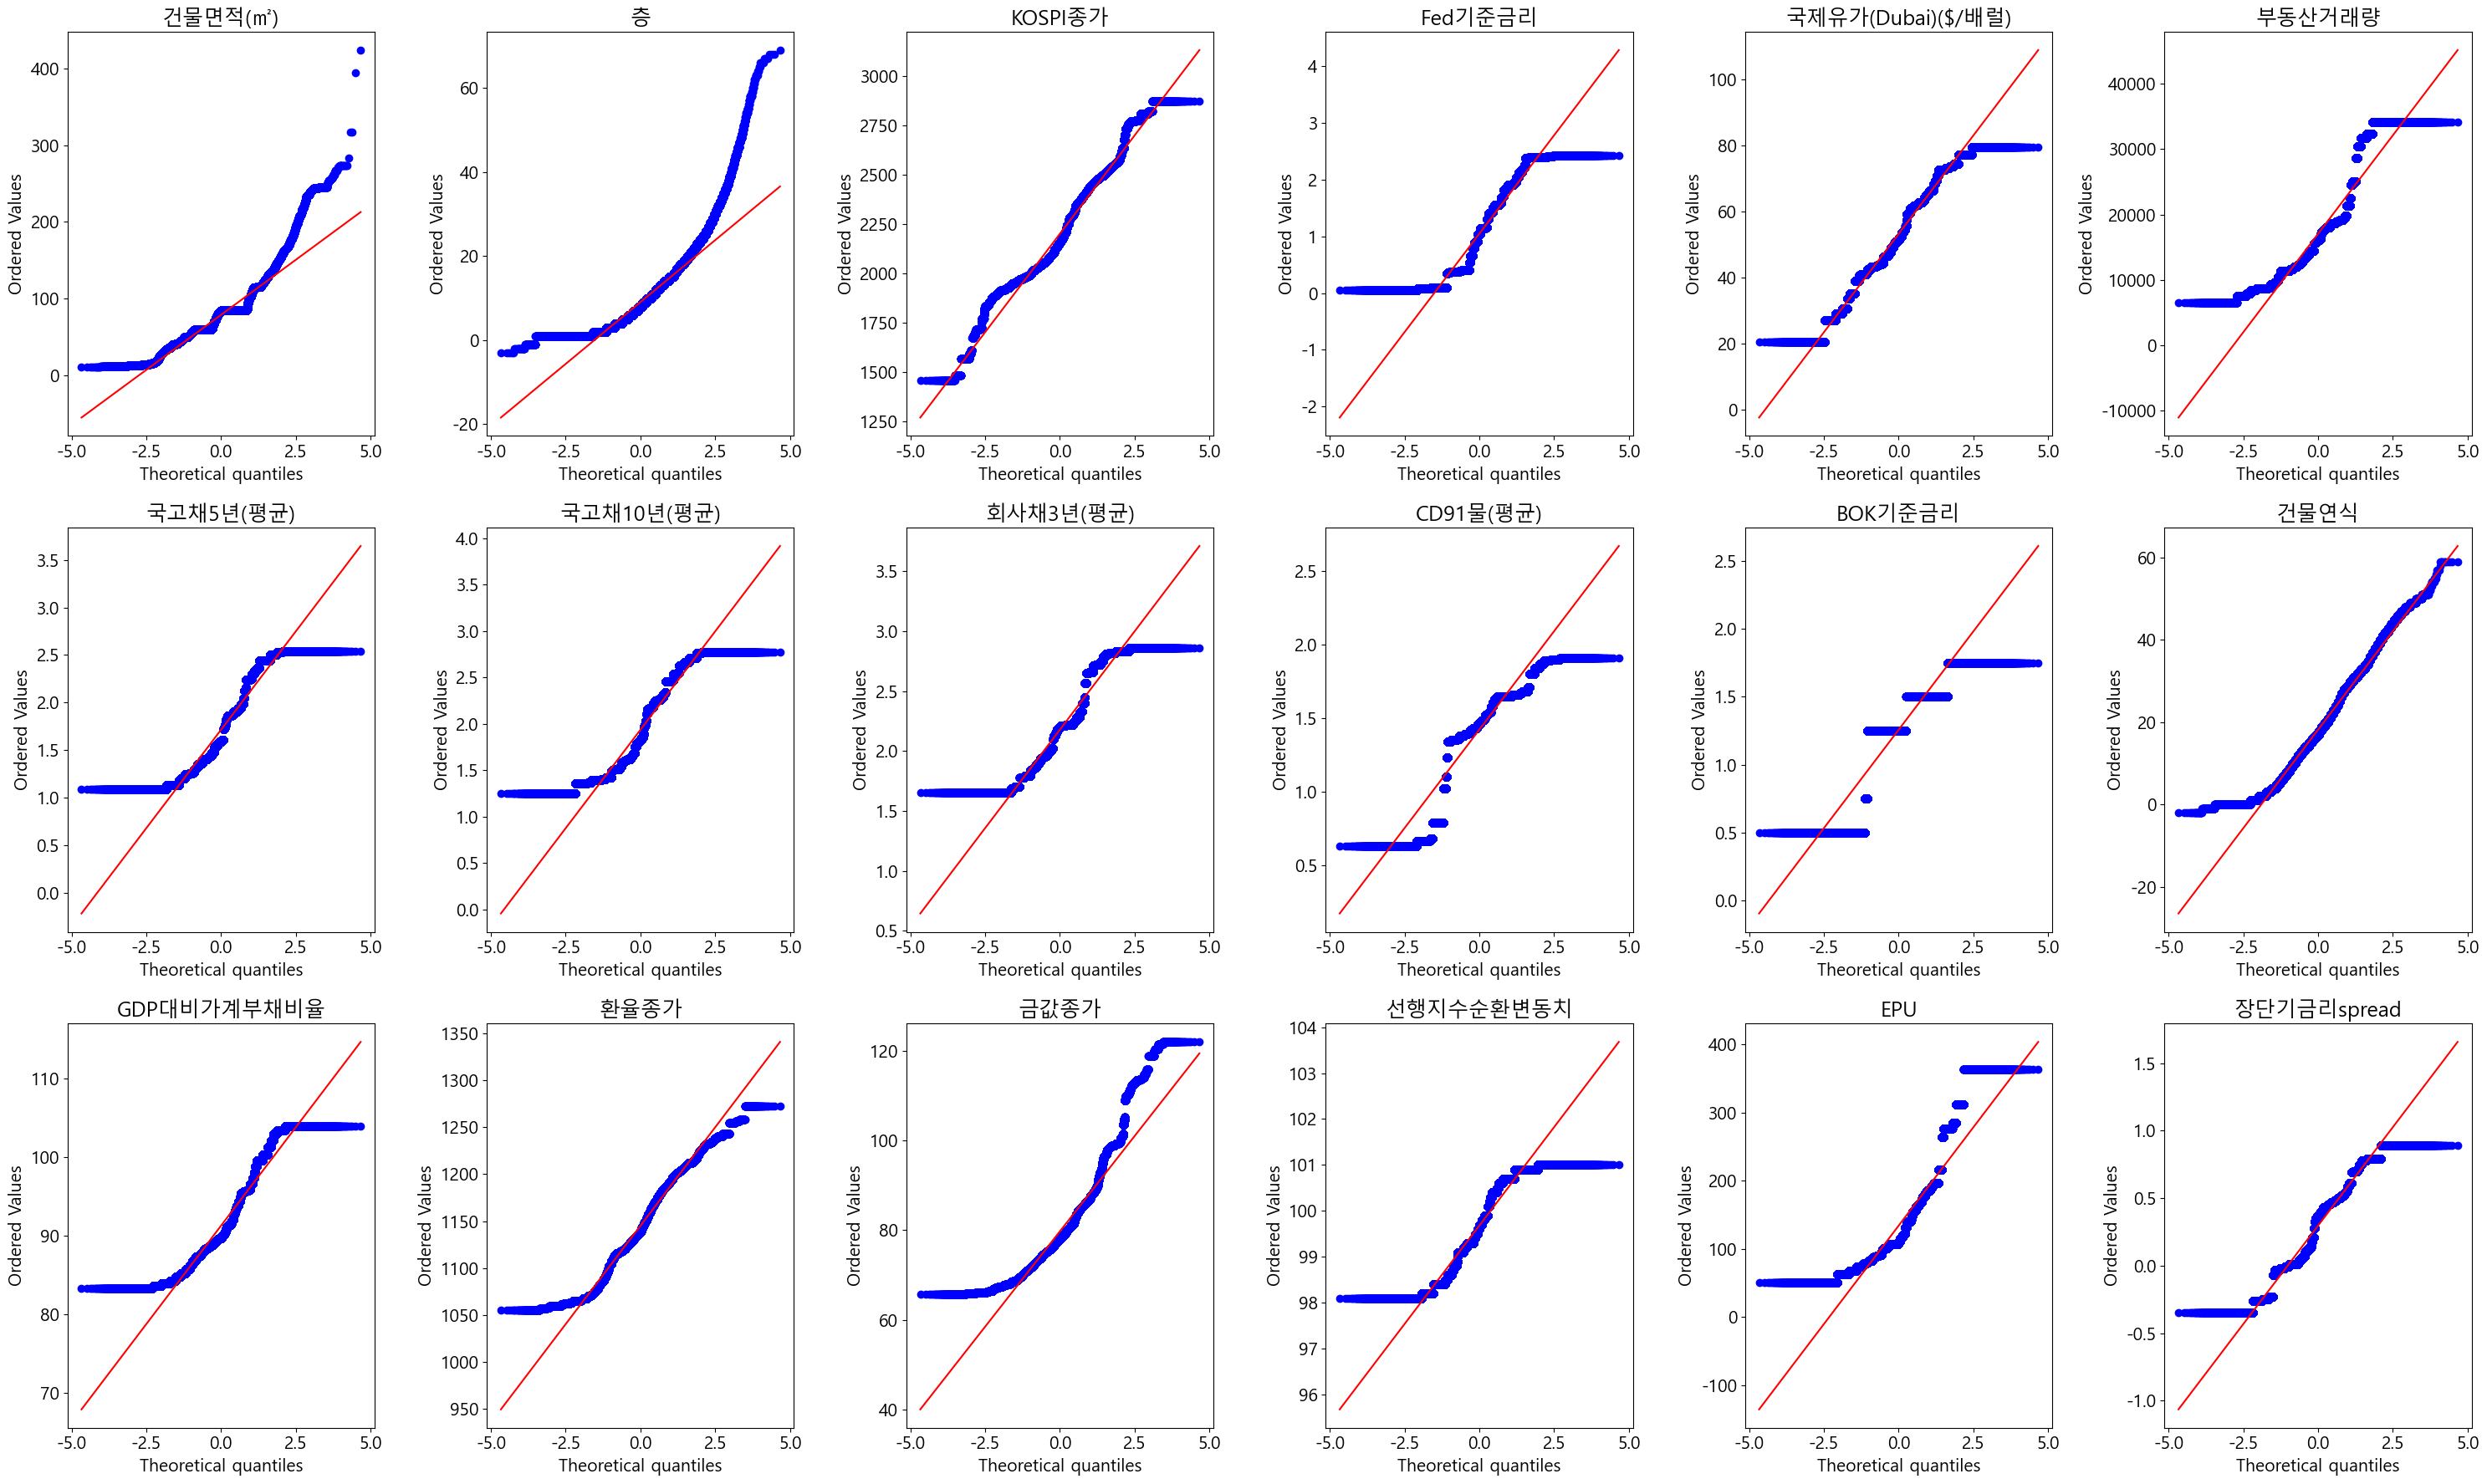

In [159]:
## qqplot
col_n = 6
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*6))

for i,col in enumerate(X_train.columns):
    stats.probplot(X_train[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

---

### 정규성검정 3 - 히스토그램 시각화

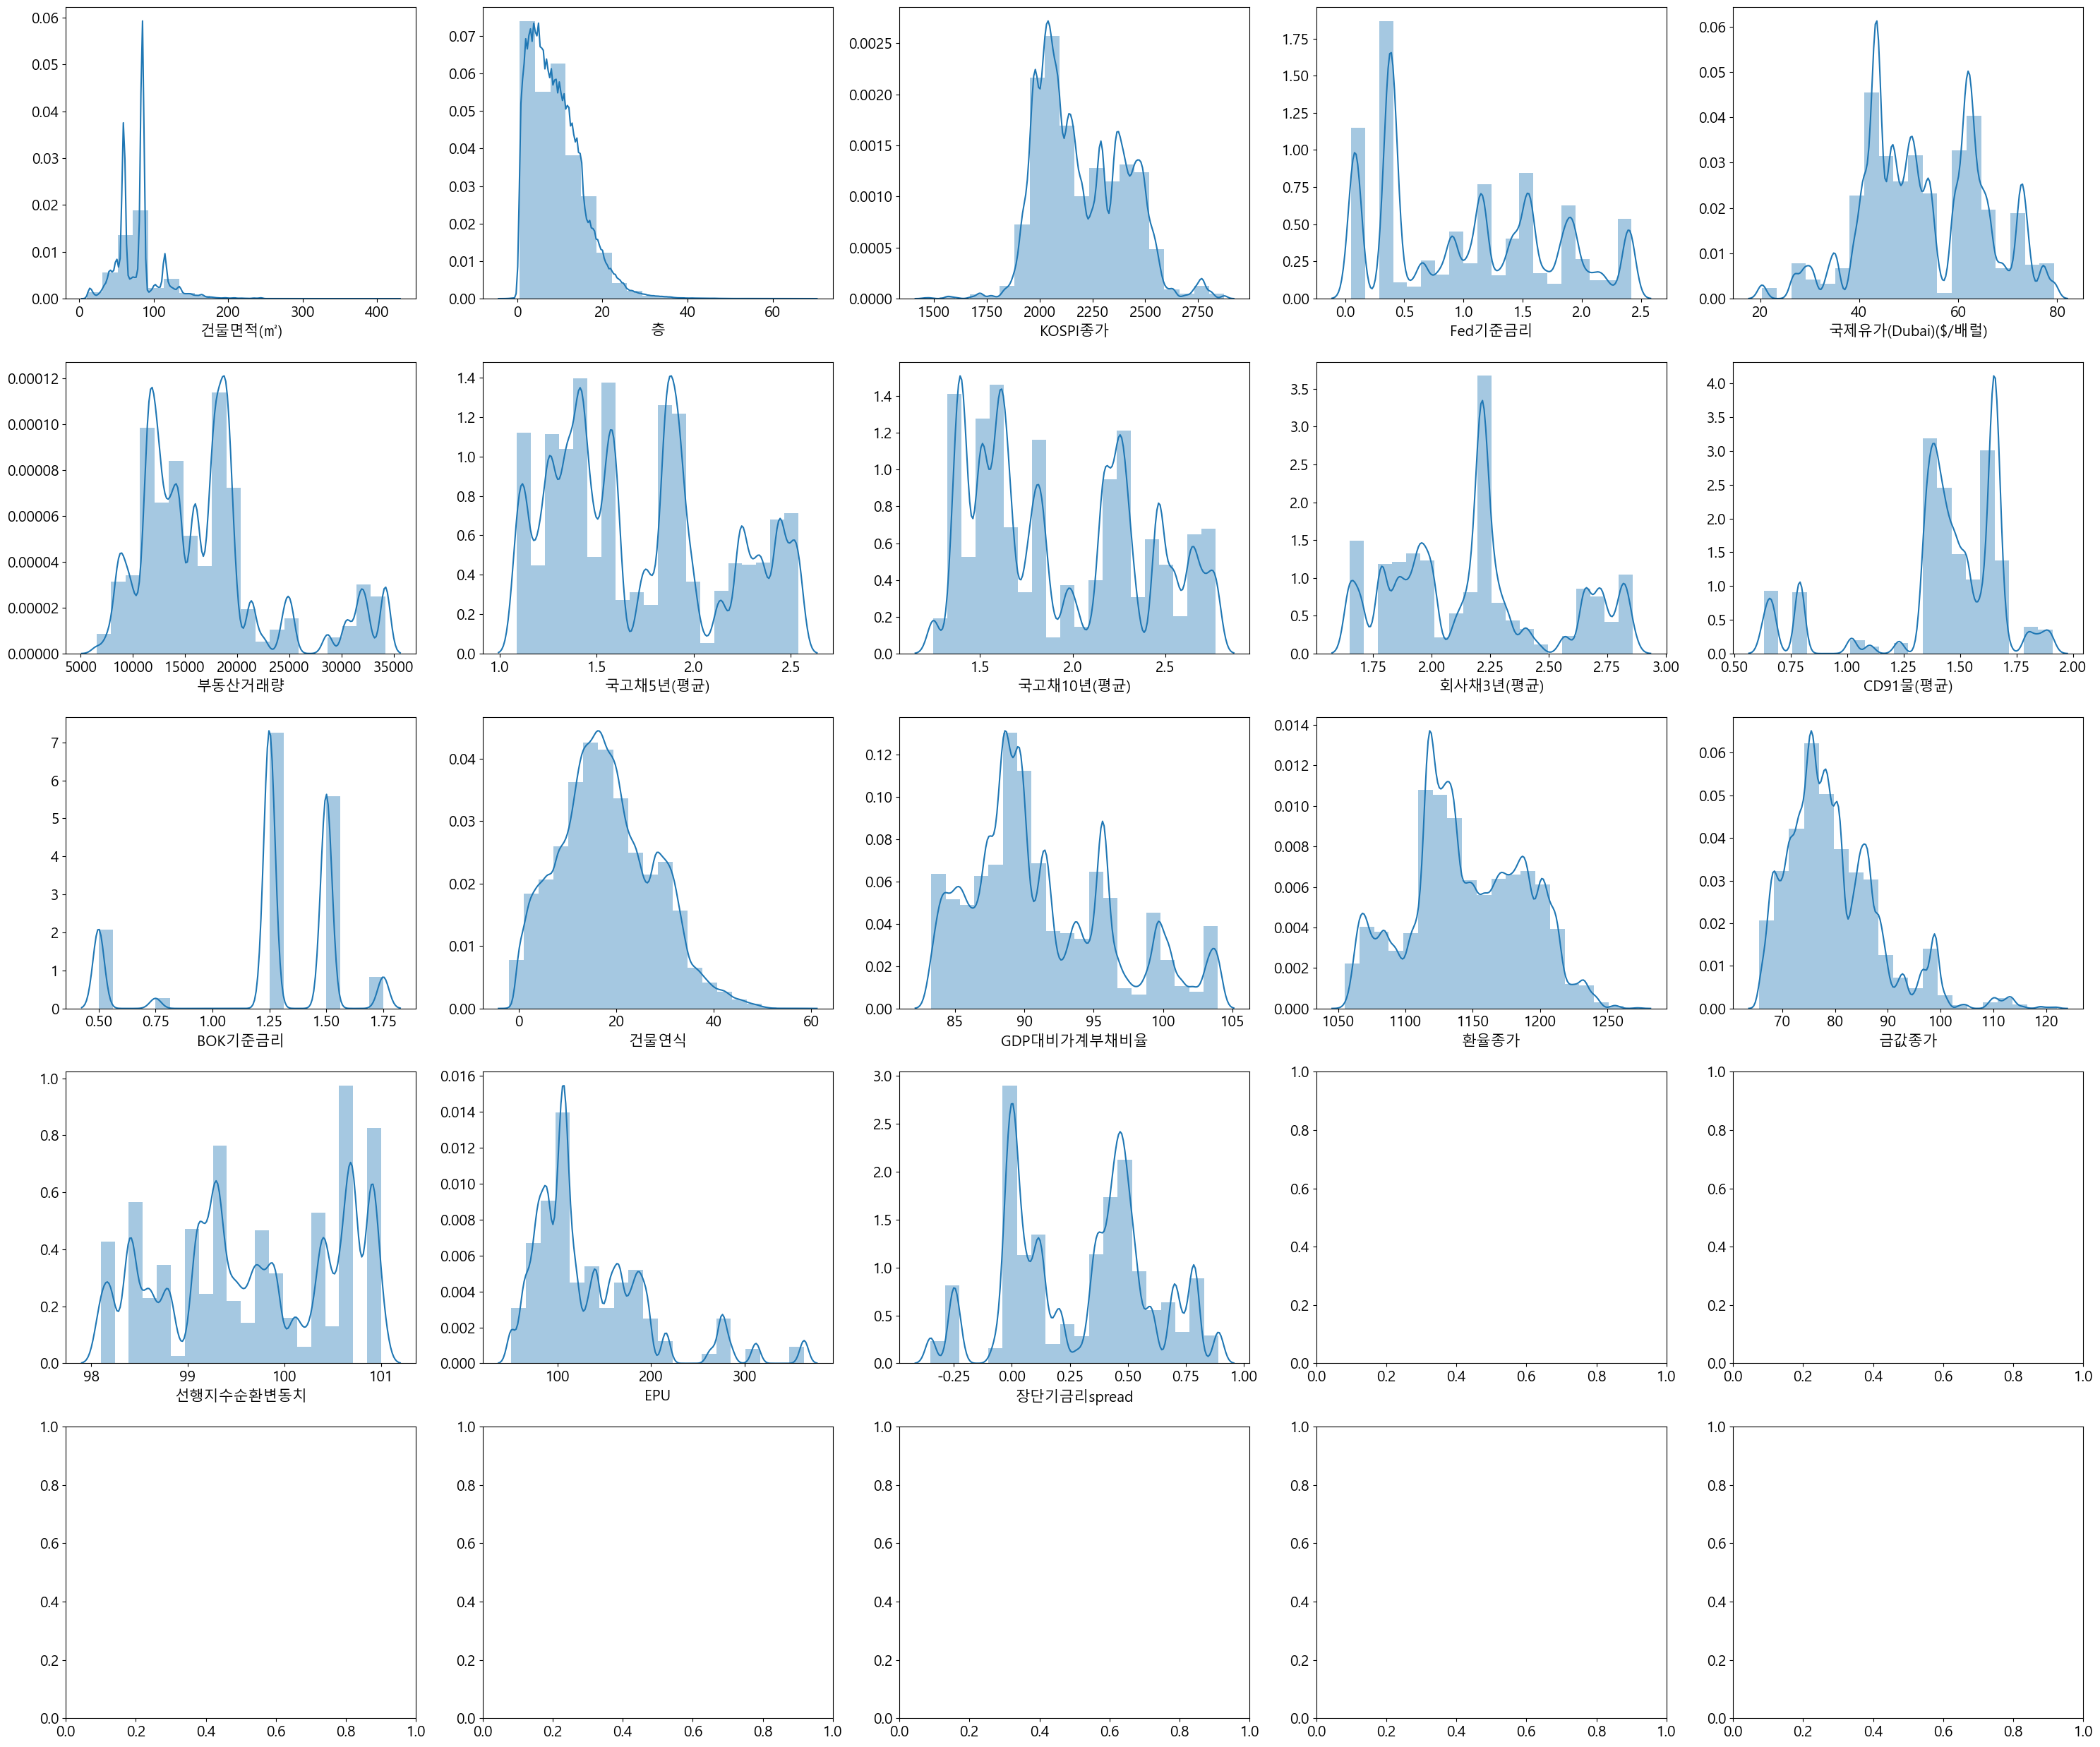

In [160]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train.columns):
    sns.distplot(X_train[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_ylabel('')  # 세로축 레이블 제거

fig.tight_layout()
plt.show()

- 정규성 논리 확보 from Shin -> 중심극한정리 
- 스케일링 후 재확인 필요 
    

In [180]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 1.940e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:25:12   Log-Likelihood:            -5.4074e+06
No. Observations:              453170   AIC:                         1.081e+07
Df Residuals:                  453151   BIC:                         1.082e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.217e+04   3.34e+04      2.161      0.031    6723.368    1.38e+05
건물면적(㎡)             958.5084      1.832    523.180      0.000     954.918     962.099
층                   701.4023      9.144     76.707      0.000     683.481     719.324
KOSPI종가              26.8658      0.883     30.430      0.000      25.135      28.596
Fed기준금리           -3606.9903    314.636    -11.464      0.000   -4223.667   -2990.314
국제유가(Dubai)($/배럴)   262.4917     14.849     17.677      0.000     233.388     291.596
부동산거래량               -0.4681      0.016    -28.860      0.000      -0.500      -0.436
국고채5년(평균)         -1.164e+04   2714.876     -4.286      0.000    -1.7e+04   -6314.427
국고채10년(평균)         1.084e+04   1868.242      5.803      0.000    7179.382    1.45e+04
회사채3년(평균)         -4951.1367    995.883     -4.972      0.000   -6903.037   -2999.236
CD91물(평균)         -1.332e+04   1388.729     -9.594      0.000    -1.6e+04   -1.06e+04
BOK기준금리            1.267e+04   1212.339     10.450      0.000    1.03e+04     1.5e+04
건물연식                130.0793      5.808     22.398      0.000     118.696     141.462
GDP대비가계부채비율        2109.0706     45.249     46.611      0.000    2020.385    2197.757
환율종가                 32.6107      3.012     10.827      0.000      26.708      38.514
금값종가                157.6978     17.222      9.157      0.000     123.943     191.452
선행지수순환변동치         -3789.1504    317.531    -11.933      0.000   -4411.500   -3166.800
EPU                   0.5264      1.282      0.411      0.681      -1.985       3.038
장단기금리spread       -5895.9365   1456.394     -4.048      0.000   -8750.424   -3041.449
==============================================================================
Omnibus:                   246699.689   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3609544.117
Skew:                           2.306   Prob(JB):                         0.00
Kurtosis:                      16.034   Cond. No.                     1.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
y_hat = fitted_model.predict()

In [182]:
residual = y - y_hat

In [183]:
import scipy.stats
sr = scipy.stats.zscore(residual)


In [184]:
sr

0         0.206462
1         0.291472
2        -0.278950
3         0.025415
4        -0.625080
            ...   
453165    1.832411
453166   -0.936983
453167    1.849534
453168   -1.205751
453169   -1.017851
Name: 물건금액(만원), Length: 453170, dtype: float64

In [185]:
sns.regplot(y_hat, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

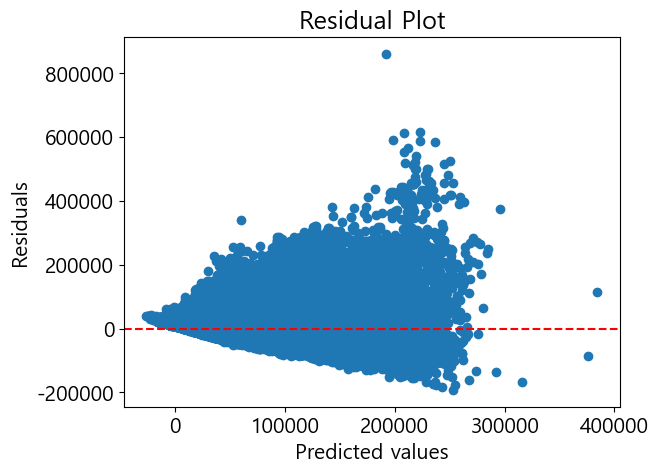

In [190]:
# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y)

# 예측값과 잔차 계산
y_pred = model.predict(X_train)
residuals = y - y_pred

# 잔차 플롯 시각화
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [191]:
X = train_df.drop('물건금액(만원)', axis=1)
X = myscaler(X)
X_train = X.select_dtypes([np.number])

Scaled (-3.65, 11.47) (-0.00, 1.00)


In [193]:
# y -> 상용로그 y 
y = np.log10(y)

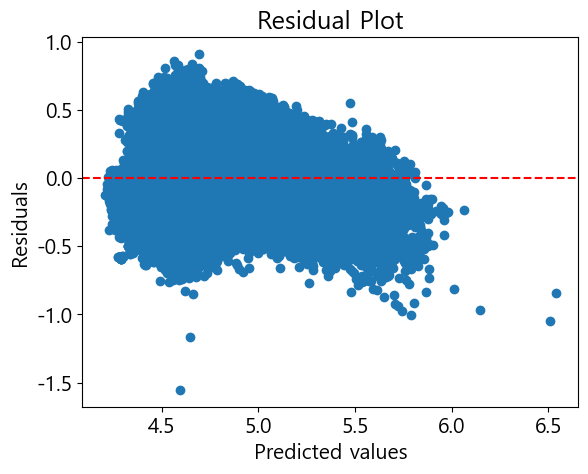

In [194]:
# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y)

# 예측값과 잔차 계산
y_pred = model.predict(X_train)
residuals = y - y_pred

# 잔차 플롯 시각화
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# 웰치 T - test

In [198]:
# 스케일링 후 OLS 시작(EPU 포함)
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.536e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:38:32   Log-Likelihood:             1.2288e+05
No. Observations:              453170   AIC:                        -2.457e+05
Df Residuals:                  453151   BIC:                        -2.455e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7501      0.000   1.73e+04      0.000       4.750       4.751
건물면적(㎡)               0.1645      0.000    594.634      0.000       0.164       0.165
층                     0.0245      0.000     87.173      0.000       0.024       0.025
KOSPI종가               0.0331      0.001     36.831      0.000       0.031       0.035
Fed기준금리              -0.0072      0.001     -6.316      0.000      -0.009      -0.005
국제유가(Dubai)($/배럴)     0.0226      0.001     25.192      0.000       0.021       0.024
부동산거래량               -0.0139      0.001    -26.724      0.000      -0.015      -0.013
국고채5년(평균)             0.0038      0.006      0.646      0.518      -0.008       0.015
국고채10년(평균)           -0.0050      0.004     -1.208      0.227      -0.013       0.003
회사채3년(평균)            -0.0140      0.002     -8.262      0.000      -0.017      -0.011
CD91물(평균)            -0.0221      0.002    -10.749      0.000      -0.026      -0.018
BOK기준금리               0.0079      0.002      3.899      0.000       0.004       0.012
건물연식                 -0.0016      0.000     -5.703      0.000      -0.002      -0.001
GDP대비가계부채비율           0.0503      0.001     42.868      0.000       0.048       0.053
환율종가                  0.0105      0.001     16.439      0.000       0.009       0.012
금값종가                  0.0115      0.001     15.071      0.000       0.010       0.013
선행지수순환변동치            -0.0153      0.001    -10.868      0.000      -0.018      -0.013
EPU                  -0.0025      0.000     -6.159      0.000      -0.003      -0.002
장단기금리spread          -0.0071      0.002     -3.267      0.001      -0.011      -0.003
==============================================================================
Omnibus:                    14026.821   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16014.587
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS -> 'EPU'컬럼 제거 (보류)

In [85]:
# train
train_df.drop('EPU', axis=1, inplace=True)
# test
test_df.drop('EPU', axis=1, inplace=True)

In [86]:
test_df.head(1)

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,장단기금리spread,물건금액(만원)
453170,양천구,2021-01-01,55.93,6,2873.469971,0.09,54.8,20938,1.32,1.73,2.14,0.68,0.5,19,104.4,1084.73,71.96,100.7,0.49,52000


In [87]:
X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
X_train = X.select_dtypes([np.number])

In [88]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 2.054e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:37:25   Log-Likelihood:            -5.4074e+06
No. Observations:              453170   AIC:                         1.081e+07
Df Residuals:                  453152   BIC:                         1.082e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.295e+04   3.33e+04      2.188      0.029    7610.354    1.38e+05
건물면적(㎡)             958.5020      1.832    523.196      0.000     954.911     962.093
층                   701.4035      9.144     76.707      0.000     683.482     719.325
KOSPI종가              26.8144      0.874     30.681      0.000      25.101      28.527
Fed기준금리           -3612.6437    314.334    -11.493      0.000   -4228.730   -2996.558
국제유가(Dubai)($/배럴)   263.3506     14.701     17.914      0.000     234.537     292.164
부동산거래량               -0.4693      0.016    -29.426      0.000      -0.501      -0.438
국고채5년(평균)         -1.139e+04   2648.333     -4.301      0.000   -1.66e+04   -6199.446
국고채10년(평균)         1.075e+04   1856.435      5.793      0.000    7116.383    1.44e+04
회사채3년(평균)         -5035.1699    974.646     -5.166      0.000   -6945.447   -3124.893
CD91물(평균)         -1.337e+04   1384.143     -9.659      0.000   -1.61e+04   -1.07e+04
BOK기준금리            1.258e+04   1194.056     10.538      0.000    1.02e+04    1.49e+04
건물연식                130.0442      5.807     22.394      0.000     118.663     141.426
GDP대비가계부채비율        2110.3725     45.137     46.754      0.000    2021.904    2198.841
환율종가                 32.9795      2.875     11.471      0.000      27.344      38.614
금값종가                156.6160     17.019      9.202      0.000     123.259     189.973
선행지수순환변동치         -3798.6157    316.693    -11.995      0.000   -4419.324   -3177.907
장단기금리spread       -5975.4684   1443.467     -4.140      0.000   -8804.619   -3146.318
==============================================================================
Omnibus:                   246700.997   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3609611.912
Skew:                           2.306   Prob(JB):                         0.00
Kurtosis:                      16.035   Cond. No.                     1.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
X_train.shape

(453170, 17)

In [131]:
# from scipy.stats import bartlett, levene
# for i in range(0,len(X_train.columns),1):
#     if i != (len(X_train.columns) -1) :
#         t_value, p_value = levene(X_train,y)   
#         print(i,p_value)
#     # else :
#     #     t_value, p_value = levene(X_train, y)  
#     #     print(i,p_value)
    

ValueError: Must enter at least two input sample vectors.

-  Residual plot 
    - 시각화
    - 잔차 독립성까지 해석 가능 

- 이분산
    - 웰치 t test 


# Scaling (보류)
1. Features - minMax
2. Target - Log 

In [119]:
def myscaler(df):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler

    df_num = df.select_dtypes([np.number])
    num_col = list(df_num.columns)

    # Scaler 객체 생성
    scaler = StandardScaler()
    x_num_scaled = scaler.fit_transform(df_num)

    # print('\t\t(min, max) (mean, std)')
    print('Scaled (%.2f, %.2f) (%.2f, %.2f)' %(x_num_scaled.min(), x_num_scaled.max(), x_num_scaled.mean(), x_num_scaled.std()))
    x_num_scaled = pd.DataFrame(x_num_scaled, columns=num_col)

    X_scaled = df.copy()
    for i in x_num_scaled:
        X_scaled[i] = x_num_scaled[i]

    return X_scaled

In [120]:
X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

In [121]:
# X -> minMax
X = myscaler(X)

Scaled (-3.65, 11.47) (-0.00, 1.00)


In [122]:
X

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,장단기금리spread
0,노원구,2016-01-01,-1.286449,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.127698,0.212750,-0.227728,0.842816,0.726133,0.708467,-1.544472,0.716146,-0.329434,-0.089932,-0.525145
1,성동구,2016-01-01,-0.111202,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.127698,0.212750,-0.227728,0.842816,0.726133,0.812190,-1.544472,0.716146,-0.329434,-0.089932,-0.525145
2,금천구,2016-01-01,0.202772,-0.990034,-1.172605,-0.977198,-2.178686,-1.116004,0.127698,0.212750,-0.227728,0.842816,0.726133,-0.432492,-1.544472,0.716146,-0.329434,-0.089932,-0.525145
3,은평구,2016-01-01,0.771643,-0.011677,-1.172605,-0.977198,-2.178686,-1.116004,0.127698,0.212750,-0.227728,0.842816,0.726133,-1.262280,-1.544472,0.716146,-0.329434,-0.089932,-0.525145
4,노원구,2016-01-01,0.194807,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.127698,0.212750,-0.227728,0.842816,0.726133,0.812190,-1.544472,0.716146,-0.329434,-0.089932,-0.525145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,0.185182,-0.990034,3.312522,-1.323442,-0.278985,2.099031,-0.923982,-0.580379,0.096251,-2.578275,-2.267644,-1.469727,2.440423,-1.433725,-0.877074,0.811921,0.549349
453166,성북구,2020-12-31,-0.621991,-1.153094,3.312522,-1.323442,-0.278985,2.099031,-0.923982,-0.580379,0.096251,-2.578275,-2.267644,0.086126,2.440423,-1.433725,-0.877074,0.811921,0.549349
453167,용산구,2020-12-31,0.182195,-0.337796,3.312522,-1.323442,-0.278985,2.099031,-0.923982,-0.580379,0.096251,-2.578275,-2.267644,-0.951109,2.440423,-1.433725,-0.877074,0.811921,0.549349
453168,은평구,2020-12-31,0.198126,-1.316153,3.312522,-1.323442,-0.278985,2.099031,-0.923982,-0.580379,0.096251,-2.578275,-2.267644,-0.225045,2.440423,-1.433725,-0.877074,0.811921,0.549349


In [123]:
X_train = X.select_dtypes([np.number])

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453170 entries, 0 to 453169
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   건물면적(㎡)            453170 non-null  float64
 1   층                  453170 non-null  float64
 2   KOSPI종가            453170 non-null  float64
 3   Fed기준금리            453170 non-null  float64
 4   국제유가(Dubai)($/배럴)  453170 non-null  float64
 5   부동산거래량             453170 non-null  float64
 6   국고채5년(평균)          453170 non-null  float64
 7   국고채10년(평균)         453170 non-null  float64
 8   회사채3년(평균)          453170 non-null  float64
 9   CD91물(평균)          453170 non-null  float64
 10  BOK기준금리            453170 non-null  float64
 11  건물연식               453170 non-null  float64
 12  GDP대비가계부채비율        453170 non-null  float64
 13  환율종가               453170 non-null  float64
 14  금값종가               453170 non-null  float64
 15  선행지수순환변동치          453170 non-null  float64
 16  장단

In [134]:
# y -> log 변환
y = np.log10(y)
y

0         4.255273
1         4.741939
2         4.565848
3         4.829947
4         4.481443
            ...   
453165    5.232996
453166    4.672098
453167    5.243038
453168    4.775974
453169    4.843233
Name: 물건금액(만원), Length: 453170, dtype: float64

In [137]:
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.684e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:11:42   Log-Likelihood:             1.2286e+05
No. Observations:              453170   AIC:                        -2.457e+05
Df Residuals:                  453152   BIC:                        -2.455e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7501      0.000   1.73e+04      0.000       4.750       4.751
건물면적(㎡)               0.1645      0.000    594.683      0.000       0.164       0.165
층                     0.0245      0.000     87.167      0.000       0.024       0.025
KOSPI종가               0.0339      0.001     38.086      0.000       0.032       0.036
Fed기준금리              -0.0069      0.001     -6.052      0.000      -0.009      -0.005
국제유가(Dubai)($/배럴)     0.0218      0.001     24.569      0.000       0.020       0.024
부동산거래량               -0.0133      0.001    -26.036      0.000      -0.014      -0.012
국고채5년(평균)            -0.0041      0.006     -0.727      0.467      -0.015       0.007
국고채10년(평균)           -0.0021      0.004     -0.520      0.603      -0.010       0.006
회사채3년(평균)            -0.0119      0.002     -7.150      0.000      -0.015      -0.009
CD91물(평균)            -0.0211      0.002    -10.283      0.000      -0.025      -0.017
BOK기준금리               0.0101      0.002      5.040      0.000       0.006       0.014
건물연식                 -0.0016      0.000     -5.613      0.000      -0.002      -0.001
GDP대비가계부채비율           0.0498      0.001     42.540      0.000       0.048       0.052
환율종가                  0.0093      0.001     15.298      0.000       0.008       0.011
금값종가                  0.0122      0.001     16.202      0.000       0.011       0.014
선행지수순환변동치            -0.0147      0.001    -10.448      0.000      -0.017      -0.012
장단기금리spread          -0.0053      0.002     -2.470      0.014      -0.010      -0.001
==============================================================================
Omnibus:                    14036.533   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16026.210
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.424   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 스케일링 후 통계적 검정 재시도 

### 스케일링 후 정규성 검정 

In [125]:
# Shapiro -> X 
from scipy import stats
for i in X_train.columns:
    a = stats.shapiro(X_train[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
장단기금리spread 0.0


In [113]:
# Shapiro -> y
from scipy import stats
a = stats.shapiro(y)
p = a.pvalue   
print(p)

0.0


In [126]:
# KS -> X 
from scipy.stats import kstest
for i in X_train.columns:
    a = kstest(X_train[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
장단기금리spread 0.0


In [116]:
# KS -> y
from scipy.stats import kstest

a = kstest(y,'norm')
p = a.pvalue
print(p)

0.0


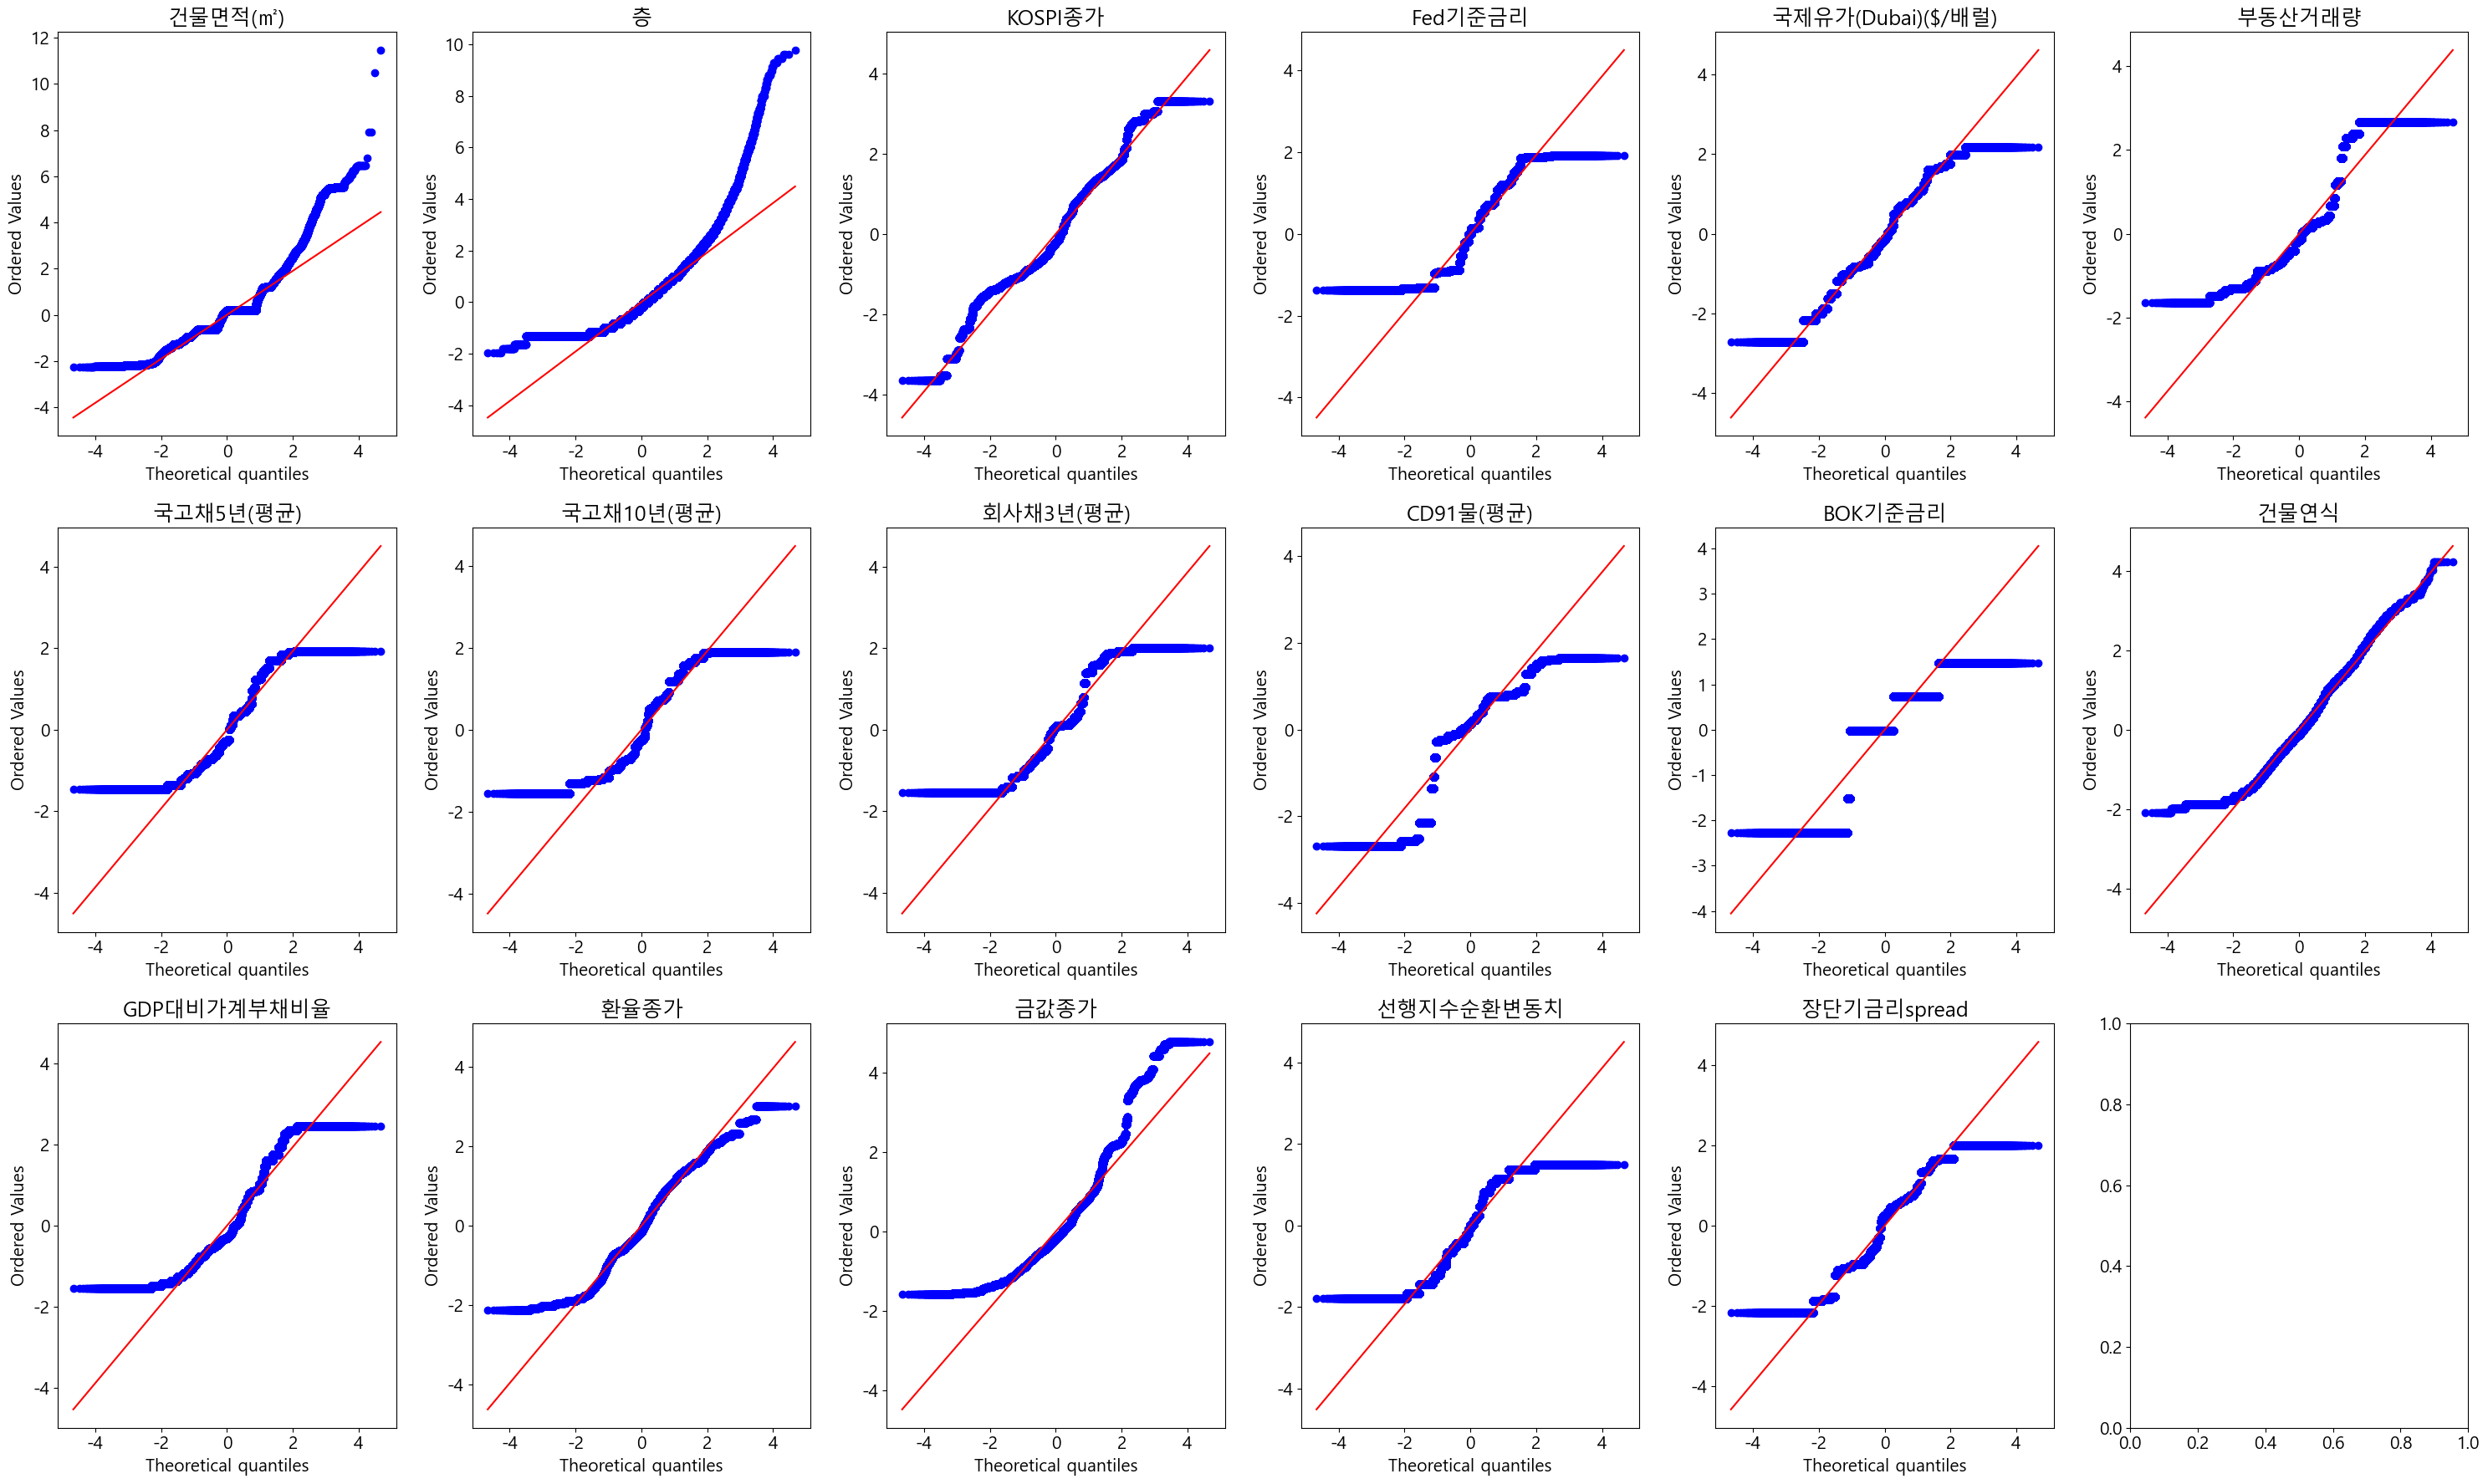

In [127]:
## qqplot - 스케일링 후 
col_n = 6
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*6))

for i,col in enumerate(X_train.columns):
    stats.probplot(X_train[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

In [133]:
y

0          18000
1          55200
2          36800
3          67600
4          30300
           ...  
453165    171000
453166     47000
453167    175000
453168     59700
453169     69700
Name: 물건금액(만원), Length: 453170, dtype: int64

# OLS_1 : Scaling 후

In [199]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.536e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:40:04   Log-Likelihood:             1.2288e+05
No. Observations:              453170   AIC:                        -2.457e+05
Df Residuals:                  453151   BIC:                        -2.455e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7501      0.000   1.73e+04      0.000       4.750       4.751
건물면적(㎡)               0.1645      0.000    594.634      0.000       0.164       0.165
층                     0.0245      0.000     87.173      0.000       0.024       0.025
KOSPI종가               0.0331      0.001     36.831      0.000       0.031       0.035
Fed기준금리              -0.0072      0.001     -6.316      0.000      -0.009      -0.005
국제유가(Dubai)($/배럴)     0.0226      0.001     25.192      0.000       0.021       0.024
부동산거래량               -0.0139      0.001    -26.724      0.000      -0.015      -0.013
국고채5년(평균)             0.0038      0.006      0.646      0.518      -0.008       0.015
국고채10년(평균)           -0.0050      0.004     -1.208      0.227      -0.013       0.003
회사채3년(평균)            -0.0140      0.002     -8.262      0.000      -0.017      -0.011
CD91물(평균)            -0.0221      0.002    -10.749      0.000      -0.026      -0.018
BOK기준금리               0.0079      0.002      3.899      0.000       0.004       0.012
건물연식                 -0.0016      0.000     -5.703      0.000      -0.002      -0.001
GDP대비가계부채비율           0.0503      0.001     42.868      0.000       0.048       0.053
환율종가                  0.0105      0.001     16.439      0.000       0.009       0.012
금값종가                  0.0115      0.001     15.071      0.000       0.010       0.013
선행지수순환변동치            -0.0153      0.001    -10.868      0.000      -0.018      -0.013
EPU                  -0.0025      0.000     -6.159      0.000      -0.003      -0.002
장단기금리spread          -0.0071      0.002     -3.267      0.001      -0.011      -0.003
==============================================================================
Omnibus:                    14026.821   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16014.587
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 국고채5년(평균), 국고채10년(평균) column 삭제

In [200]:
X_train.drop(['국고채5년(평균)', '국고채10년(평균)'], axis=1, inplace=True)

# VIF_1

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train_1):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_1.values,i)
                         for i in range(X_train_1.shape[1])]
    vif["Feature"] = X_train_1.columns
    return vif


In [202]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor            Feature
0     1.018911            건물면적(㎡)
1     1.051653                  층
2    10.506465            KOSPI종가
3    16.513301            Fed기준금리
4    10.679819  국제유가(Dubai)($/배럴)
5     3.502700             부동산거래량
6    21.039819          회사채3년(평균)
7    32.485511          CD91물(평균)
8    41.100318            BOK기준금리
9     1.048094               건물연식
10   17.719504        GDP대비가계부채비율
11    4.405767               환율종가
12    7.508096               금값종가
13   15.900998          선행지수순환변동치
14    1.988263                EPU
15   27.754332        장단기금리spread


### CD91물 삭제

In [35]:
X_train.drop('CD91물(평균)', axis=1, inplace=True)

# OLS_2

In [36]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 3.256e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:29:36   Log-Likelihood:            -2.5521e+05
No. Observations:              453170   AIC:                         5.105e+05
Df Residuals:                  453155   BIC:                         5.106e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.5406      0.012    782.916      0.000       9.517       9.565
건물면적(㎡)               5.2119      0.009    594.919      0.000       5.195       5.229
층                     0.6627      0.008     87.187      0.000       0.648       0.678
KOSPI종가               0.6048      0.014     44.628      0.000       0.578       0.631
Fed기준금리              -0.0705      0.008     -8.441      0.000      -0.087      -0.054
국제유가(Dubai)($/배럴)     0.2146      0.010     21.980      0.000       0.195       0.234
부동산거래량               -0.1224      0.005    -24.850      0.000      -0.132      -0.113
회사채3년(평균)            -0.1182      0.010    -11.559      0.000      -0.138      -0.098
BOK기준금리              -0.0603      0.012     -5.197      0.000      -0.083      -0.038
건물연식                 -0.0232      0.004     -5.684      0.000      -0.031      -0.015
GDP대비가계부채비율           0.4992      0.010     48.599      0.000       0.479       0.519
환율종가                  0.1144      0.007     17.447      0.000       0.102       0.127
금값종가                  0.1166      0.010     11.540      0.000       0.097       0.136
선행지수순환변동치            -0.1352      0.008    -16.580      0.000      -0.151      -0.119
장단기금리spread          -0.0750      0.014     -5.433      0.000      -0.102      -0.048
==============================================================================
Omnibus:                    14085.728   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16077.888
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       3.422   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_2

In [37]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor            Feature
0     6.223540            건물면적(㎡)
1     5.068482                  층
2   120.114358            KOSPI종가
3    27.395713            Fed기준금리
4    78.897509  국제유가(Dubai)($/배럴)
5    12.042551             부동산거래량
6    52.473596          회사채3년(평균)
7    60.481235            BOK기준금리
8     5.540367               건물연식
9    44.264996        GDP대비가계부채비율
10   15.084296               환율종가
11   20.763425               금값종가
12   64.905147          선행지수순환변동치
13  133.804770        장단기금리spread


### 장단기금리spread 컬럼 삭제

In [38]:
X_train.drop('장단기금리spread', axis=1, inplace=True)

# OLS_3

In [39]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 3.506e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:29:51   Log-Likelihood:            -2.5523e+05
No. Observations:              453170   AIC:                         5.105e+05
Df Residuals:                  453156   BIC:                         5.106e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.5149      0.011    847.390      0.000       9.493       9.537
건물면적(㎡)               5.2116      0.009    594.880      0.000       5.194       5.229
층                     0.6626      0.008     87.174      0.000       0.648       0.677
KOSPI종가               0.6253      0.013     48.031      0.000       0.600       0.651
Fed기준금리              -0.0699      0.008     -8.368      0.000      -0.086      -0.054
국제유가(Dubai)($/배럴)     0.2010      0.009     21.299      0.000       0.182       0.219
부동산거래량               -0.1280      0.005    -26.550      0.000      -0.137      -0.119
회사채3년(평균)            -0.1638      0.006    -28.101      0.000      -0.175      -0.152
BOK기준금리              -0.0329      0.010     -3.150      0.002      -0.053      -0.012
건물연식                 -0.0229      0.004     -5.598      0.000      -0.031      -0.015
GDP대비가계부채비율           0.5070      0.010     49.842      0.000       0.487       0.527
환율종가                  0.1163      0.007     17.759      0.000       0.103       0.129
금값종가                  0.1171      0.010     11.596      0.000       0.097       0.137
선행지수순환변동치            -0.1634      0.006    -26.018      0.000      -0.176      -0.151
==============================================================================
Omnibus:                    14095.032   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16084.424
Skew:                           0.411   Prob(JB):                         0.00
Kurtosis:                       3.422   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_3

In [40]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor            Feature
0     6.203726            건물면적(㎡)
1     5.057175                  층
2   116.756452            KOSPI종가
3    23.492250            Fed기준금리
4    66.736951  국제유가(Dubai)($/배럴)
5    11.525542             부동산거래량
6    20.034342          회사채3년(평균)
7    57.286229            BOK기준금리
8     5.532729               건물연식
9    44.152645        GDP대비가계부채비율
10   14.298677               환율종가
11   20.544349               금값종가
12   31.647913          선행지수순환변동치


### KOSPI 종가 컬럼 삭제

In [41]:
X_train.drop('KOSPI종가', axis=1, inplace=True)

# OLS_4

In [42]:
feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 3.760e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:30:01   Log-Likelihood:            -2.5638e+05
No. Observations:              453170   AIC:                         5.128e+05
Df Residuals:                  453157   BIC:                         5.129e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6581      0.011    889.908      0.000       9.637       9.679
건물면적(㎡)               5.2176      0.009    594.107      0.000       5.200       5.235
층                     0.6662      0.008     87.438      0.000       0.651       0.681
Fed기준금리              -0.0277      0.008     -3.332      0.001      -0.044      -0.011
국제유가(Dubai)($/배럴)     0.1020      0.009     11.045      0.000       0.084       0.120
부동산거래량               -0.0719      0.005    -15.342      0.000      -0.081      -0.063
회사채3년(평균)            -0.0633      0.005    -11.606      0.000      -0.074      -0.053
BOK기준금리               0.0548      0.010      5.314      0.000       0.035       0.075
건물연식                 -0.0216      0.004     -5.259      0.000      -0.030      -0.014
GDP대비가계부채비율           0.7740      0.009     90.636      0.000       0.757       0.791
환율종가                 -0.0034      0.006     -0.561      0.574      -0.015       0.008
금값종가                 -0.0042      0.010     -0.429      0.668      -0.023       0.015
선행지수순환변동치            -0.0203      0.006     -3.654      0.000      -0.031      -0.009
==============================================================================
Omnibus:                    14051.459   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16006.677
Skew:                           0.411   Prob(JB):                         0.00
Kurtosis:                       3.416   Cond. No.                         51.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# 환율종가 & 금값종가 column 제거
X_train.drop(['환율종가', '금값종가'], axis=1, inplace=True)

## VIF_4

In [44]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor            Feature
0    6.106400            건물면적(㎡)
1    4.973835                  층
2   18.319041            Fed기준금리
3   44.465357  국제유가(Dubai)($/배럴)
4    7.109552             부동산거래량
5    8.829724          회사채3년(평균)
6   22.998294            BOK기준금리
7    5.402440               건물연식
8   11.522906        GDP대비가계부채비율
9    9.652359          선행지수순환변동치


In [45]:
# 국제유가 col 삭제
X_train.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

# OLS_5

In [46]:
feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 5.009e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:30:07   Log-Likelihood:            -2.5649e+05
No. Observations:              453170   AIC:                         5.130e+05
Df Residuals:                  453160   BIC:                         5.131e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.6553      0.008   1199.057      0.000       9.639       9.671
건물면적(㎡)         5.2200      0.009    594.367      0.000       5.203       5.237
층               0.6657      0.008     87.356      0.000       0.651       0.681
Fed기준금리         0.0187      0.006      3.046      0.002       0.007       0.031
부동산거래량         -0.0572      0.004    -14.600      0.000      -0.065      -0.050
회사채3년(평균)      -0.0495      0.004    -13.921      0.000      -0.057      -0.043
BOK기준금리         0.0753      0.010      7.642      0.000       0.056       0.095
건물연식           -0.0225      0.004     -5.490      0.000      -0.031      -0.014
GDP대비가계부채비율     0.7897      0.008     95.550      0.000       0.774       0.806
선행지수순환변동치      -0.0067      0.003     -1.941      0.052      -0.013    6.66e-05
==============================================================================
Omnibus:                    14069.875   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16030.565
Skew:                           0.411   Prob(JB):                         0.00
Kurtosis:                       3.417   Cond. No.                         39.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_5

In [47]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0    6.103294      건물면적(㎡)
1    4.973835            층
2   11.289780      Fed기준금리
3    6.522285       부동산거래량
4    8.119077    회사채3년(평균)
5   20.692597      BOK기준금리
6    5.401891         건물연식
7   10.833742  GDP대비가계부채비율
8    9.129485    선행지수순환변동치


In [48]:
# BOK기준금리 제거
X_train.drop('BOK기준금리', axis=1, inplace=True)

# OLS_6

In [49]:
feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 5.633e+04
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:30:11   Log-Likelihood:            -2.5652e+05
No. Observations:              453170   AIC:                         5.131e+05
Df Residuals:                  453161   BIC:                         5.132e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.7105      0.004   2733.612      0.000       9.704       9.717
건물면적(㎡)         5.2192      0.009    594.281      0.000       5.202       5.236
층               0.6655      0.008     87.315      0.000       0.651       0.680
Fed기준금리         0.0613      0.003     24.294      0.000       0.056       0.066
부동산거래량         -0.0651      0.004    -17.199      0.000      -0.072      -0.058
회사채3년(평균)      -0.0451      0.004    -12.852      0.000      -0.052      -0.038
건물연식           -0.0225      0.004     -5.495      0.000      -0.031      -0.014
GDP대비가계부채비율     0.7336      0.004    193.630      0.000       0.726       0.741
선행지수순환변동치      -0.0150      0.003     -4.556      0.000      -0.021      -0.009
==============================================================================
Omnibus:                    14074.026   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16025.652
Skew:                           0.411   Prob(JB):                         0.00
Kurtosis:                       3.415   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
df0['층'].describe()

count    536097.000000
mean          9.088667
std           6.146602
min          -3.000000
25%           4.000000
50%           8.000000
75%          13.000000
max          69.000000
Name: 층, dtype: float64

In [51]:
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor      Feature
0    5.362790      건물면적(㎡)
1    4.384840            층
2    3.560076      Fed기준금리
3    6.299096       부동산거래량
4    8.092153    회사채3년(평균)
5    4.469694         건물연식
6    7.333581  GDP대비가계부채비율
7    8.460557    선행지수순환변동치


In [52]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 0.18156684472670578, RMSE :  0.426, MAE: 0.426
Variance score :  0.498


In [53]:
np.log(100)

4.605170185988092

In [54]:
np.log(df0['물건금액(만원)'])

0          9.798127
1         10.918718
2         10.513253
3         11.121363
4         10.318903
            ...    
536092    12.429216
536093    11.835009
536094    12.055250
536095    10.518673
536096    11.245046
Name: 물건금액(만원), Length: 536097, dtype: float64

-----

## 스케일링OLS -> VIF 반복 후 -> 최종 OLS 확인

# X_test column 제거 
- X_train에서 날린 컬럼들 모두 제거

# DF split 
## 강남/ 비강남 DF 

# Modeling 


## 1. OLS 확인 
- P-value확인 후 컬럼 지우기 
- coef: feature별 계수 
